# Prediction Using supervised ML
## Level- Beginner

### Predict the percentage of a student based on  the number of study hours.
### Linear Regression

Importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Reading the data

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

The data contains 2 columns 1) Number of Study hours   2)Percentage of score.


We have to check whether number of Study hours affects the Percentage of score using a Linear Regression model.

#### Checking for null values

In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

No null values found


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is high correlation between Number of Study hours and Percentage of score.

#### Plotting the distribution of scores using a line graph

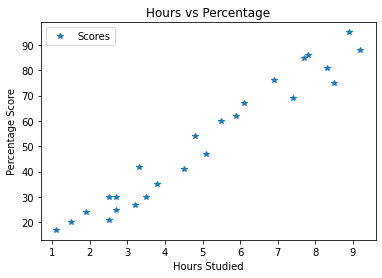

In [7]:
df.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


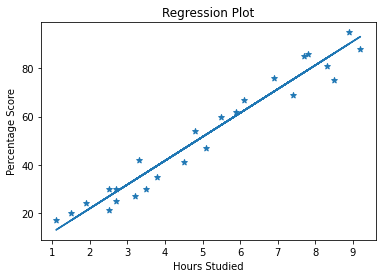

In [11]:
# Plotting the regression line
a = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, marker="*")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.plot(X, a)
plt.title('Regression Plot')
plt.show()

[Text(0.5, 1.0, 'Regression Plot using seaborn')]

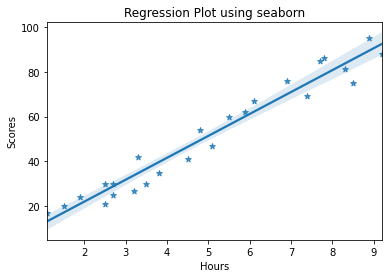

In [12]:
import seaborn as sns
sns.regplot(x='Hours', y="Scores", data=df, marker="*").set(title="Regression Plot using seaborn")

In [13]:
print(X_test) 
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Testing using new data

In [15]:
hours = [9.25]
own_pred = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737539


### Model Evaluation

In [16]:
from sklearn import metrics  
mae= metrics.mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error:{mae: .2f}')
       

Mean Absolute Error: 4.18


In [17]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(f"Root Mean Squared error :{rmse: .2f}")

Root Mean Squared error : 4.65


R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted..

In [18]:
r_squared=metrics.r2_score(y_test, y_pred)
print(f"R squared score : {r_squared: .2f}")

R squared score :  0.95


#### Conclusion
#### The model fits well for the given data.